In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import os
import glob

In [5]:
folder = 'new_data/processed/liquidities'
raw = pd.read_excel(os.path.join(folder, 'joined_liquidity_date.xlsx'), index_col=0)

In [290]:
results = raw.groupby(['stock_name', 'date']).agg({'realized_spread': ['mean', 'median', 'std'],
                                     'effective_spread': ['mean', 'median', 'std']})
results.columns = ['_'.join(col).strip() for col in results.columns.values]
results = results.reset_index()

## Mean effective spread

* Medians are actually close to means so analysis is enough for mean
* Election day vs. Jun 19 show to have little variation amonst themselves
* On the other hand, on Veteran's day we see significant variation for most stocks:
    - Facebook and Amazon with 30-50% decrease
    - Apple and Tesla shooting to 2-3x increase; United too to a lesser degree

- Absolute shifts

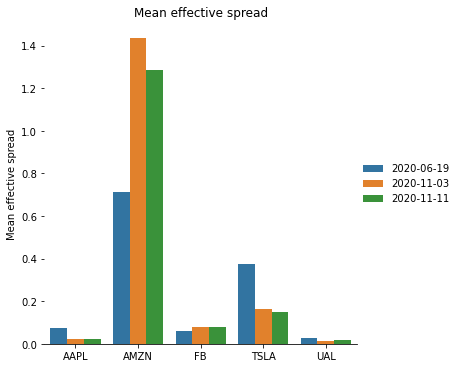

In [306]:
g = sns.catplot(
    data=results, kind="bar",
    x="stock_name", y="effective_spread_mean", hue="date",
    ci="sd"
)
g.despine(left=True)
g.set_axis_labels("", "Mean effective spread")
g.legend.set_title("")
plt.title('Mean effective spread')
plt.show()

- Relative shifts

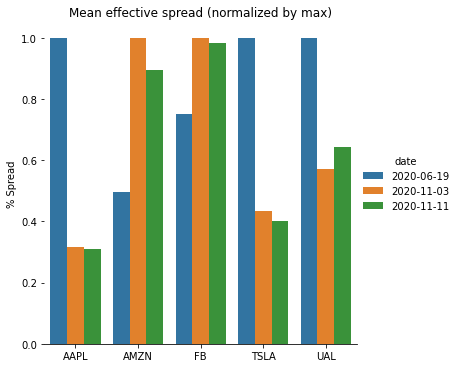

In [308]:
g = sns.catplot(
    data=results.assign(relative_spread=results['effective_spread_mean']/results.groupby('stock_name')['effective_spread_mean'].transform(lambda x: x.max())), kind="bar",
    x="stock_name", y="relative_spread", hue="date",
    ci="sd"
)
g.despine(left=True)
g.set_axis_labels("", "% Spread")
plt.title('Mean effective spread (normalized by max)')
plt.show()

## Mean realized spread

There seems to be little correlation between effective and realized spread

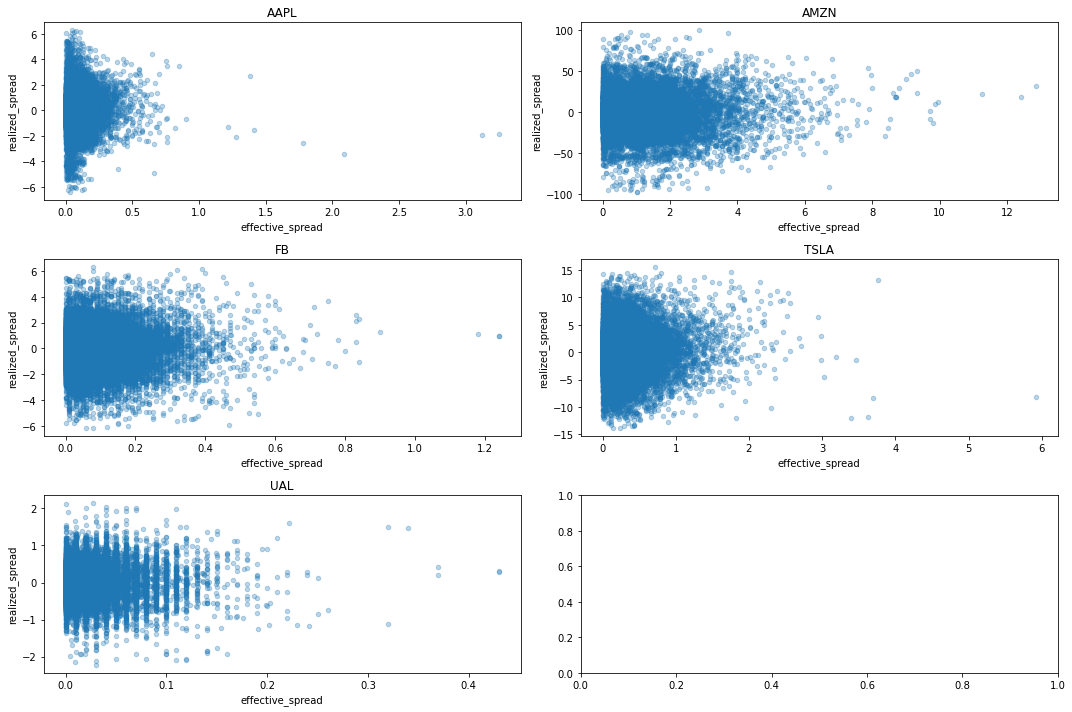

In [299]:
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(15,10))
ax = ax.flatten()
for i, name in enumerate(results['stock_name'].unique()):
    raw[raw['stock_name']==name].plot.scatter(x='effective_spread', y='realized_spread', alpha=0.3, ax=ax[i])
    ax[i].set_title(name)
plt.tight_layout()

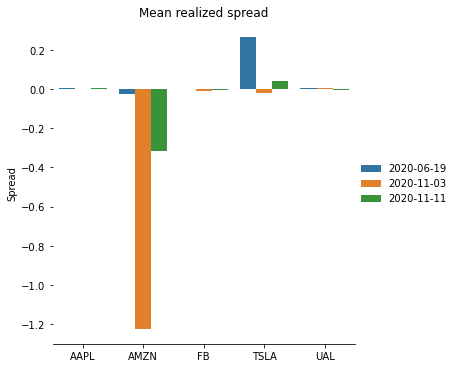

In [309]:
g = sns.catplot(
    data=results, kind="bar",
    x="stock_name", y="realized_spread_mean", hue="date",
    ci="sd"
)
g.despine(left=True)
g.set_axis_labels("", "Spread")
g.legend.set_title("")

plt.title('Mean realized spread')
plt.show()

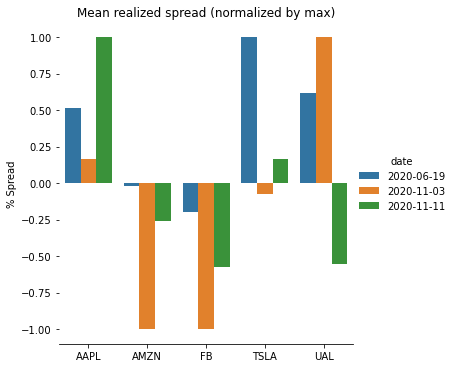

In [310]:
g = sns.catplot(
    data=results.assign(relative_spread=results['realized_spread_mean']/results.groupby('stock_name')['realized_spread_mean'].transform(lambda x: np.abs(x).max())), kind="bar",
    x="stock_name", y="relative_spread", hue="date",
    ci="sd"
)
g.despine(left=True)
g.set_axis_labels("", "% Spread")

plt.title('Mean realized spread (normalized by max)')
plt.show()

# Old

<AxesSubplot:xlabel='stock_name'>

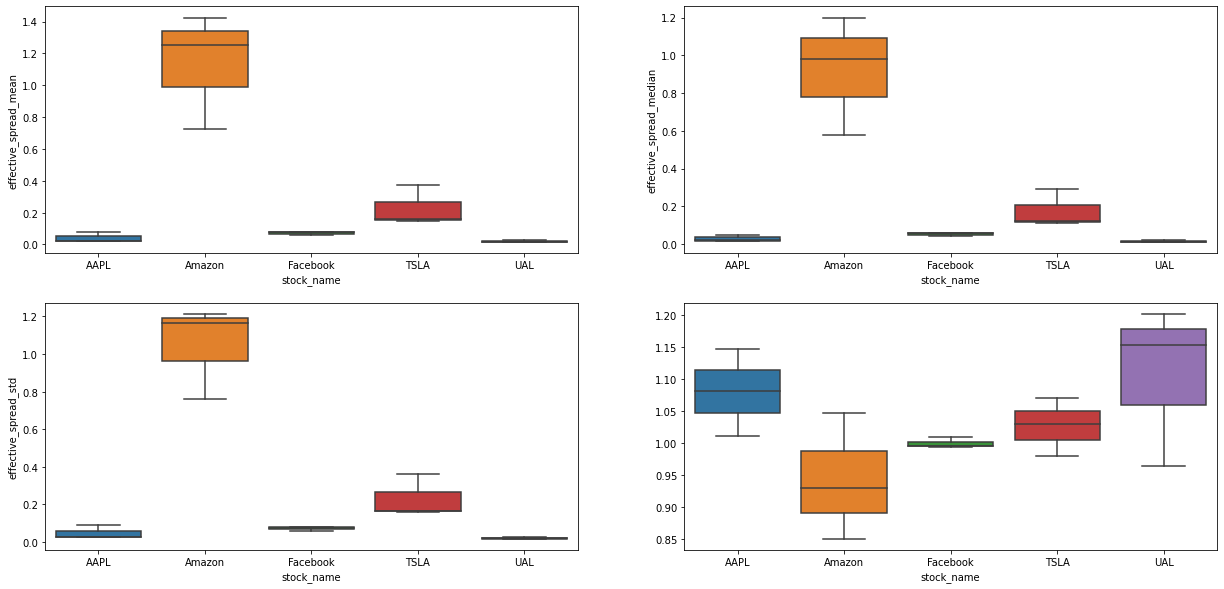

In [132]:
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(21,10))
ax = ax.flatten()
sns.boxplot(x=results['stock_name'], y=results['effective_spread_mean'], ax=ax[0], title=)
sns.boxplot(x=results['stock_name'], y=results['effective_spread_median'], ax=ax[1])
sns.boxplot(x=results['stock_name'], y=results['effective_spread_std'], ax=ax[2])
sns.boxplot(x=results['stock_name'], y=results['effective_spread_std']/results['effective_spread_mean'], ax=ax[3])